# 17/2/20
____
Я устал от рад.поправок, они не сходятся. На это потрачено более трёх дней и получен нулевой результат.

Можно посмотреть результаты для эффективности реконструкции KS

In [1]:
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(13,7)}, font_scale=1.7)
plt.style.use('seaborn-whitegrid')

In [2]:
kin_tree = uproot.open('../../outputs/11/trees/550.00_9158.root')['pic_kinfit']
kin_tree_mc = uproot.open('../../outputs/model_new_v6/trees/550.00_0.root')['pic_kinfit']
ebeam = 550

In [3]:
kin_df = kin_tree.pandas.df()
kin_df_mc = kin_tree_mc.pandas.df()

In [4]:
kin_df_mc.head()

,kl_en,chi2,angle_diff,mass_reco,mom_ks,mom_sum,passed_kl,passed_chi2,passed_angle,passed_mom,passed_mom_sum
entry,,,,,,,,,,,
0,233.600006,363.958840,0.517750,563.675104,103.575742,216.725052,True,False,False,False,True
1,88.700005,13.691049,0.118129,497.571284,234.763800,237.758423,False,True,True,True,True
2,42.600002,1396.327187,0.674396,570.901416,137.770886,216.416924,False,False,False,False,True
3,165.600006,197.516530,0.657431,502.594416,220.322943,227.674118,True,False,False,True,True
4,360.400024,38.367714,0.106223,497.530983,236.852325,235.298027,True,True,True,True,True


Посмотрю картинки

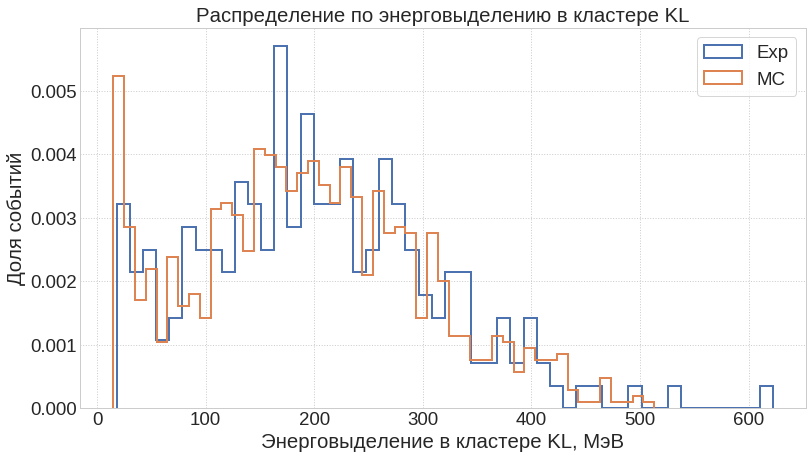

In [5]:
plt.hist( kin_df.query('passed_chi2&passed_angle&passed_mom&passed_mom_sum').kl_en, bins=50, 
         histtype='step', lw=2, density =True , label='Exp' );
plt.hist( kin_df_mc.query('passed_chi2&passed_angle&passed_mom&passed_mom_sum').kl_en, bins=50, 
         histtype='step', lw=2, density =True , label='MC' );
plt.grid(linestyle=":")
plt.legend(frameon=True)
plt.title('Распределение по энерговыделению в кластере KL');
plt.xlabel('Энерговыделение в кластере KL, МэВ');
plt.ylabel('Доля событий');
# plt.savefig('outputs/images/6_kl_energy_dist.png', dpi=200)

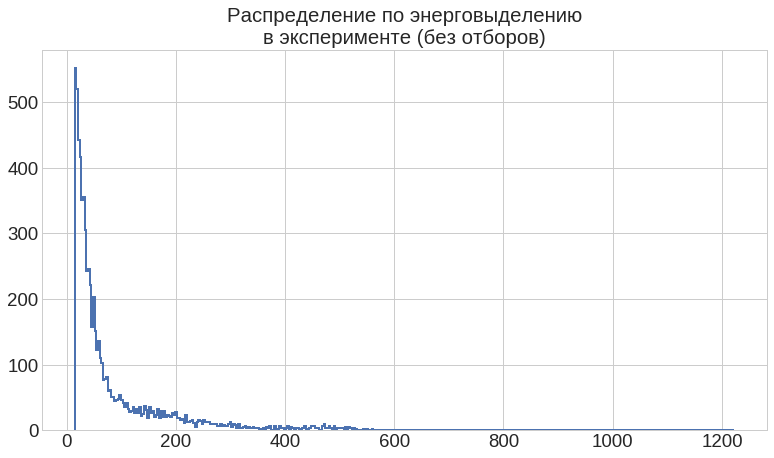

In [6]:
plt.hist( kin_df.kl_en, bins=400, histtype='step', lw=2 );
plt.title('Распределение по энерговыделению\nв эксперименте (без отборов)');

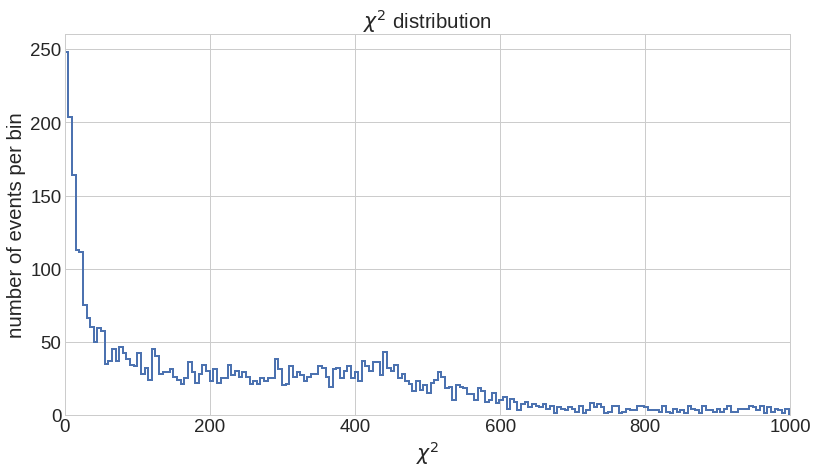

In [7]:
plt.hist( kin_df.query('chi2<1000').chi2, bins=200, histtype='step', lw=2 );
plt.title('$\\chi^2$ distribution');
plt.xlabel('$\\chi^2$');
plt.ylabel('number of events per bin');
plt.xlim(0, 1000);
# plt.yscale('log')

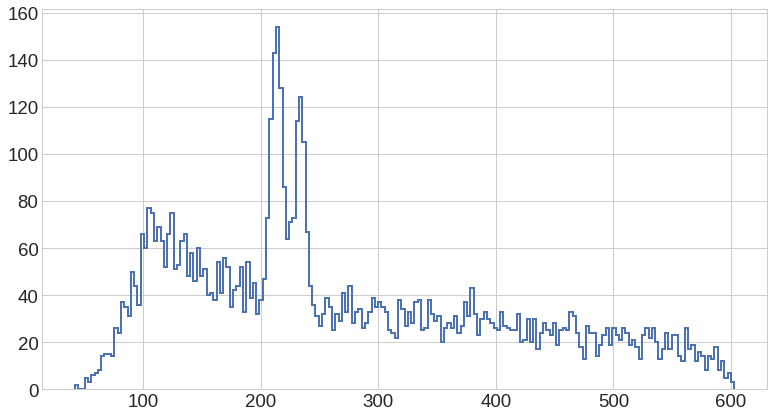

In [8]:
plt.hist( kin_df.mom_sum, bins=200, histtype='step', lw=2 );

In [9]:
mPi = 139.57
mKs = 497.614
np.sqrt( (ebeam / 2.)**2 - mPi * mPi)

236.9498155728339

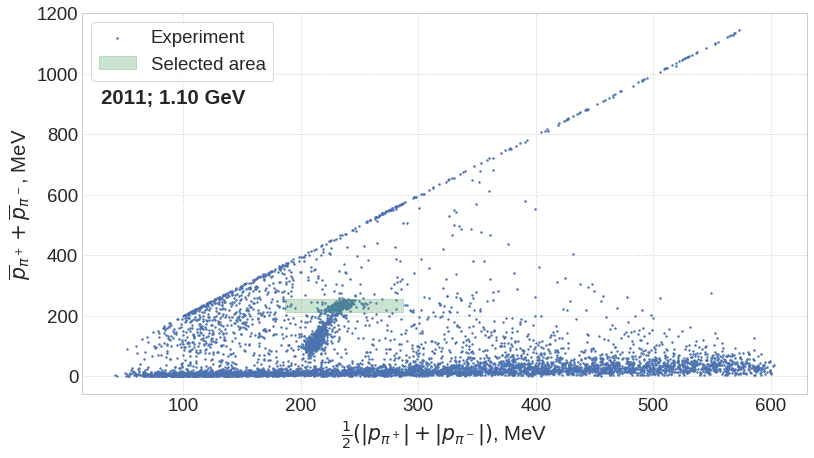

In [10]:
# plt.scatter( kin_df_mc.mom_sum, kin_df_mc.mom_ks, s=2)
plt.scatter( kin_df.mom_sum, kin_df.mom_ks , s=2, label='Experiment' )
x_ideal = np.sqrt( (ebeam / 2.)**2 - mPi * mPi)
y_ideal = np.sqrt( ebeam**2 - mKs ** 2 )
dy = 2 * (0.0869 * ebeam - 36.53)
xs = np.linspace(x_ideal-50, x_ideal+50, 4)
y_mins = np.ones(4)*(y_ideal - dy)
y_maxs = np.ones(4)*(y_ideal + dy)
plt.fill_between(xs, y_mins, y_maxs, alpha=0.3, color='g', label='Selected area');
plt.ylabel('$\\overline{p}_{\\pi^+} + \\overline{p}_{\\pi^-}$, MeV');
plt.xlabel('$\\frac{1}{2} ( |p_{\\pi^+}| + |p_{\\pi^-}| )$, MeV')
plt.grid(linestyle=':')
plt.text(30, 900, "2011; {0:.2f} GeV".format(ebeam*2e-3), fontweight='black');
plt.legend(frameon=True);
# plt.savefig('outputs/images/reco.png', dpi=200)

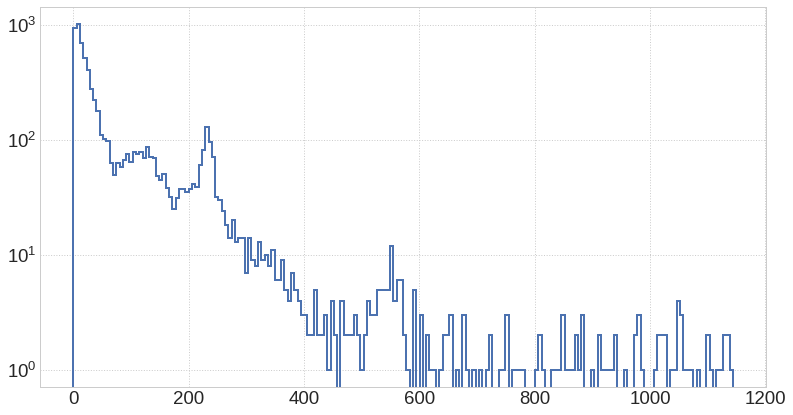

In [11]:
plt.hist( kin_df.mom_ks, bins=200, histtype='step', lw=2 );
# plt.xlim(10, 1000);
plt.grid(linestyle=':')
plt.yscale('log')

Поиграю с классификаторами

In [12]:
kin_df = kin_df.query('chi2<100000').copy()

In [13]:
kin_df.head()

,kl_en,chi2,angle_diff,mass_reco,mom_ks,mom_sum,passed_kl,passed_chi2,passed_angle,passed_mom,passed_mom_sum
entry,,,,,,,,,,,
0,21.662098,2.833985,0.352269,597.183638,39.389986,270.528549,False,True,True,False,True
1,114.400352,409.243680,0.430509,541.838684,129.700615,212.315956,True,False,True,False,True
2,471.058929,245.820290,0.037124,286.592603,559.566205,280.432770,True,False,True,False,True
4,475.858490,232.290827,0.265717,291.264927,496.869474,249.910439,True,False,True,False,True
5,30.959068,314.365222,0.218401,598.318293,10.505074,382.580002,False,False,True,False,False


In [14]:
from sklearn import preprocessing

In [15]:
cols = ['kl_en','chi2','angle_diff','mass_reco','mom_ks','mom_sum']
kin_data = preprocessing.scale(kin_df[cols])

In [16]:
kin_data = pd.DataFrame(kin_data, columns=cols)

In [17]:
X = kin_data
y = kin_df.passed_kl&kin_df.passed_chi2&kin_df.passed_angle&kin_df.passed_mom&kin_df.passed_mom_sum

Обучение без учителя

In [18]:
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [39]:
clf = TSNE(learning_rate=1000, perplexity=40)

In [40]:
transformed = clf.fit_transform(X)

In [41]:
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

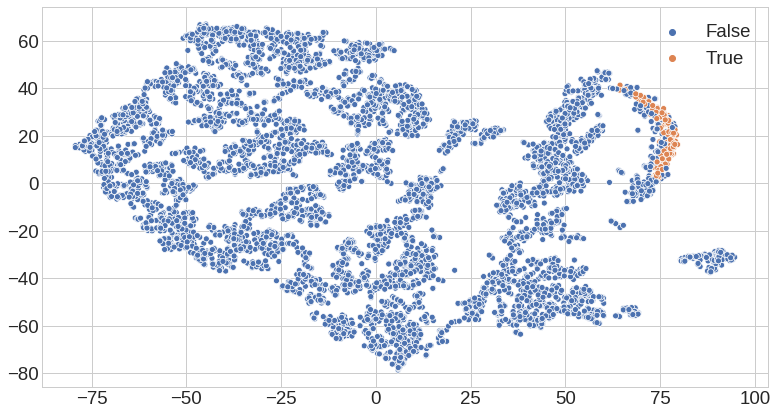

In [42]:
sns.scatterplot(x_axis, y_axis, hue=y);

In [184]:
kin_df['x'] = x_axis
kin_df['y'] = y_axis

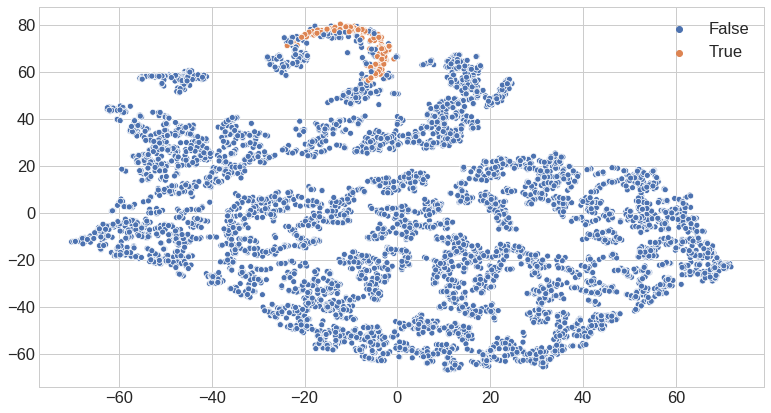

In [159]:
sns.scatterplot(x_axis, y_axis, hue=y);

Теперь на это можно натравить `kmeans`